In [15]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 

# Firstly load data
raw_data = loadarff('A2-Rice/Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(raw_data[0])
df_preprocessed = df.copy()
print(df.shape)


(3810, 8)


This data set and it's describtion can be found in http://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik . It has 3810 samples and 8 Features, 7 numerical features and one binary. The first 7 features describe charactieristics of images of the two rice types Cammeo and Osmancik. So we have two classes. 

In [16]:
# look at the datad
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


In [17]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In the description of the data set say that there are no missing values, we will check if values are set to "unknown", "null" or none. We are seeing that the mimus of the values are not 0. So this is can not be an encoding for null values

In [20]:
np.sum(df == "unknown", axis=0)

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [22]:
np.sum(df == "NULL", axis=0)

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [23]:
np.sum(df == "None", axis=0)

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

Like the dataset desribition said, we can not find any missing values.

In [27]:
df.dtypes

Area                 float64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area          float64
Extent               float64
Class                 object
dtype: object

In [35]:
# we have to only to replace the class values with numbers. The other other 7 features are numerical.
df["Class"].unique()

array([b'Cammeo', b'Osmancik'], dtype=object)

In [42]:
rice_mapping = {
    b'Cammeo': 0,
    b'Osmancik': 1,
}
df_preprocessed["Class"] = df["Class"].apply(lambda x: rice_mapping[x])

In [44]:
df_preprocessed.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0


In [46]:
df_preprocessed.Class.unique()

array([0, 1], dtype=int64)

In [49]:
df_preprocessed.groupby("Class").describe()

Area                                                                 \
        count          mean          std     min       25%      50%      75%   
Class                                                                          
0      1630.0  14162.892025  1286.770521  9908.0  13289.25  14212.0  14997.0   
1      2180.0  11549.783486  1041.908607  7551.0  10850.50  11552.5  12269.0   

               Perimeter              ... Convex_Area           Extent  \
           max     count        mean  ...         75%      max   count   
Class                                 ...                                
0      18913.0    1630.0  487.438942  ...     15361.0  19099.0  1630.0   
1      15420.0    2180.0  429.415505  ...     12524.0  15800.0  2180.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
Class                                                                        
0      0.651420  0.082197  0.497413  0.580921  0.634436  0.717667  0.861050  
1      0.669796  0.072340  0.501078  0.610567  0.652695  0.732591  0.832747  

[2 rows x 56 columns]

### Now we need to normalize all the data

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>],
       [<Axes: title={'center': 'Minor_Axis_Length'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Convex_Area'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

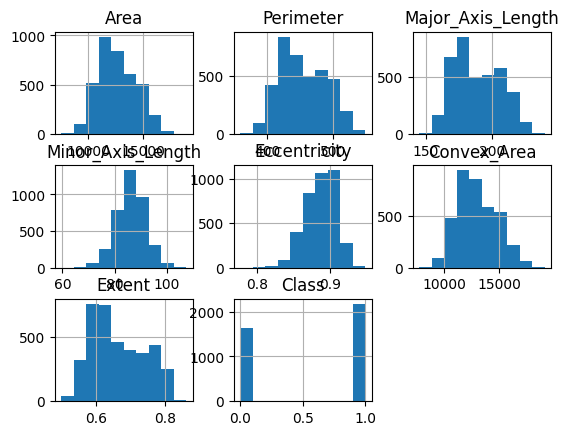

In [53]:
df_preprocessed.hist()


For the first 7 feature columns we have a gaussian distribution, so we will use for a standarization. Also see not points in the data that are too far from the others, so outliers. For the class column we not need noralisation. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scaler = StandardScaler()
df_scaled = df_preprocessed.copy()
df_scaled["age"] = std_scaler.fit_transform(df_preprocessed[["age"]])
df_scaled["age"] = std_scaler.fit_transform(df_preprocessed[["age"]])

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_scaled = df_preprocessed.copy()

std_scaler = StandardScaler()
columns_to_scale = list(df_scaled.columns)
columns_to_scale.remove("Class")
df_scaled[columns_to_scale] = std_scaler.fit_transform(df_preprocessed[columns_to_scale])

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>],
       [<Axes: title={'center': 'Minor_Axis_Length'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Convex_Area'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

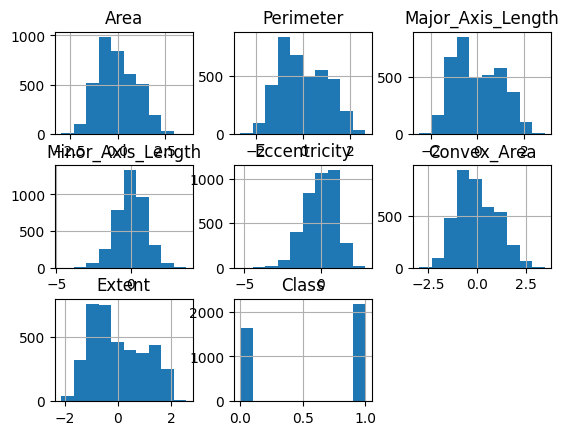

In [58]:
df_scaled.hist()

In [59]:
# we shuffle the original data, to destroy any kind of sorting it could have
shuffle_df = df_scaled.sample(frac=1).reset_index(drop=True)
shuffle_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,0.004776,-0.457490,-0.604086,0.939770,-1.410648,-0.036864,0.379499,1
1,0.586138,0.205909,0.026889,1.186828,-0.782547,0.558047,-0.458678,1
2,0.862097,0.967842,1.016327,0.288689,0.858182,0.830456,-0.880272,0
3,-0.167266,-0.004978,0.383800,-0.876895,1.083647,-0.215280,-1.364381,1
4,-0.449575,-0.717630,-0.868081,0.371062,-1.264126,-0.472493,-0.660228,1


In [63]:
shuffle_df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03,3.810000e+03,3810.000000
mean,4.102871e-17,-1.454654e-16,-5.408331e-17,-5.501578e-16,5.949164e-16,-4.625055e-16,-4.904796e-16,0.572178
std,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,0.494828
min,-2.953991e+00,-2.673019e+00,-2.494027e+00,-4.674645e+00,-5.267280e+00,-2.943312e+00,-2.130313e+00,0.000000
25%,-7.489160e-01,-7.893376e-01,-8.266678e-01,-6.252425e-01,-6.951263e-01,-7.464501e-01,-8.166890e-01,0.000000
50%,-1.421522e-01,-1.513437e-01,-1.700159e-01,2.110226e-02,1.047129e-01,-1.384541e-01,-2.145916e-01,1.000000
75%,7.402821e-01,8.272709e-01,8.468352e-01,6.685081e-01,7.551068e-01,7.494085e-01,8.368337e-01,1.000000
max,3.605523e+00,2.646823e+00,2.879351e+00,3.705439e+00,2.937147e+00,3.459430e+00,2.578260e+00,1.000000


In [60]:
shuffle_df.shape

(3810, 8)

In [62]:
# write preprocessed, normalized and shuffeld data to csv file
shuffle_df.to_csv("A2-Rice/rice-preprocessed.csv", index=False)
